In [60]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
combustiveis_2001_2012 = pandas.read_csv('combustivel-brasil-2001-2012.csv')

In [3]:
combustiveis_2001_2012

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,Jul/01,ETANOL HIDRATADO,17899,R$/l,1.009,0.165,0.639,1.580,0.193,0.163,0.816,0.156,0.318,1.578,0.192
1,Aug/01,ETANOL HIDRATADO,28796,R$/l,1.014,0.173,0.649,1.650,0.208,0.171,0.806,0.155,0.400,1.342,0.193
2,Sep/01,ETANOL HIDRATADO,32994,R$/l,1.027,0.173,0.630,1.790,0.218,0.168,0.809,0.157,0.380,1.421,0.194
3,Oct/01,ETANOL HIDRATADO,42036,R$/l,1.039,0.166,0.650,1.880,0.224,0.160,0.816,0.150,0.400,1.337,0.184
4,Nov/01,ETANOL HIDRATADO,34592,R$/l,1.033,0.167,0.670,1.880,0.217,0.162,0.815,0.149,0.410,1.287,0.183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,Sep/12,ÓLEO DIESEL,28844,R$/l,2.136,0.111,1.790,2.950,0.232,0.052,1.904,0.083,1.639,2.437,0.044
687,Oct/12,ÓLEO DIESEL,35122,R$/l,2.145,0.112,1.799,2.950,0.227,0.052,1.918,0.085,1.650,2.570,0.044
688,Nov/12,ÓLEO DIESEL,29152,R$/l,2.148,0.113,1.800,2.950,0.223,0.053,1.925,0.084,1.638,2.570,0.044
689,Dec/12,ÓLEO DIESEL,29334,R$/l,2.151,0.112,1.869,2.950,0.224,0.052,1.927,0.081,1.660,2.570,0.042


In [4]:
combustiveis_2013_2021 = pandas.read_csv('combustivel-brasil-2013-2021.csv')

In [5]:
combustiveis_2013_2021.rename(columns = {"PREÇO MÉDIO REVENDA": "PRECO MÉDIO REVENDA"},
                                              inplace = True)

In [6]:
combustiveis_2013_2021

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,Jan/13,OLEO DIESEL,32749,R$/l,2.156,0.114,1.869,2.950,0.230,0.053,1.926,0.080,1.398,2.570,0.042
1,Jan/13,OLEO DIESEL S10,4741,R$/l,2.235,0.108,1.990,2.950,0.245,0.048,1.990,0.073,1.800,2.470,0.037
2,Jan/13,ETANOL HIDRATADO,39584,R$/l,1.956,0.244,1.479,3.120,0.266,0.125,1.690,0.222,1.220,2.475,0.131
3,Jan/13,GASOLINA COMUM,41990,R$/l,2.763,0.148,2.229,3.899,0.386,0.054,2.377,0.109,2.080,2.895,0.046
4,Jan/13,GLP,39597,R$/13kg,40.164,3.964,26.000,62.000,10.310,0.099,29.854,4.462,15.000,45.000,0.149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Oct/21,GASOLINA COMUM,18703,R$/l,6.341,0.403,4.690,7.889,-,0.064,-,-,-,-,-
640,Oct/21,GLP,14140,R$/13kg,100.793,8.708,74.000,135.000,-,0.086,-,-,-,-,-
641,Oct/21,GNV,1373,R$/m³,4.145,0.431,2.849,5.949,-,0.104,-,-,-,-,-
642,Oct/21,OLEO DIESEL,8186,R$/l,5.032,0.295,3.890,6.420,-,0.059,-,-,-,-,-


In [7]:
combustiveis_2001_2021 = pandas.concat([combustiveis_2001_2012, combustiveis_2013_2021], sort=False)

In [8]:
combustiveis_2001_2021

,MÊS,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO
0,Jul/01,ETANOL HIDRATADO,17899,R$/l,1.009,0.165,0.639,1.58,0.193,0.163,0.816,0.156,0.318,1.578,0.192,NaN,NaN,NaN,NaN,NaN
1,Aug/01,ETANOL HIDRATADO,28796,R$/l,1.014,0.173,0.649,1.65,0.208,0.171,0.806,0.155,0.400,1.342,0.193,NaN,NaN,NaN,NaN,NaN
2,Sep/01,ETANOL HIDRATADO,32994,R$/l,1.027,0.173,0.630,1.79,0.218,0.168,0.809,0.157,0.380,1.421,0.194,NaN,NaN,NaN,NaN,NaN
3,Oct/01,ETANOL HIDRATADO,42036,R$/l,1.039,0.166,0.650,1.88,0.224,0.160,0.816,0.15,0.400,1.337,0.184,NaN,NaN,NaN,NaN,NaN
4,Nov/01,ETANOL HIDRATADO,34592,R$/l,1.033,0.167,0.670,1.88,0.217,0.162,0.815,0.149,0.410,1.287,0.183,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Oct/21,GASOLINA COMUM,18703,R$/l,6.341,0.403,NaN,NaN,-,0.064,NaN,-,NaN,NaN,-,4.690,7.889,-,-,-
640,Oct/21,GLP,14140,R$/13kg,100.793,8.708,NaN,NaN,-,0.086,NaN,-,NaN,NaN,-,74.000,135.000,-,-,-
641,Oct/21,GNV,1373,R$/m³,4.145,0.431,NaN,NaN,-,0.104,NaN,-,NaN,NaN,-,2.849,5.949,-,-,-
642,Oct/21,OLEO DIESEL,8186,R$/l,5.032,0.295,NaN,NaN,-,0.059,NaN,-,NaN,NaN,-,3.890,6.420,-,-,-


In [9]:
filtro_gasolina = combustiveis_2001_2021["PRODUTO"]=="GASOLINA COMUM"

In [10]:
combustiveis_2001_2021 = combustiveis_2001_2021[filtro_gasolina]

In [11]:
preco_gasolina_2001_2021 = combustiveis_2001_2021[["MÊS", "PRECO MÉDIO REVENDA"]]

In [12]:
preco_gasolina_2001_2021.reset_index(drop=True, inplace=True)

In [13]:
preco_gasolina_2001_2021

,MÊS,PRECO MÉDIO REVENDA
0,Jul/01,1.681
1,Aug/01,1.711
2,Sep/01,1.718
3,Oct/01,1.779
4,Nov/01,1.780
...,...,...
239,Jun/21,5.687
240,Jul/21,5.807
241,Aug/21,5.933
242,Sep/21,6.078


In [14]:
petroleo_brent_2001_2021 = pandas.read_csv('petroleo-brent-2001-2021.csv')

In [15]:
petroleo_brent_2001_2021 = petroleo_brent_2001_2021.iloc[::-1]

In [16]:
petroleo_brent_2001_2021.reset_index(drop=True, inplace=True)

In [17]:
petroleo_brent_2001_2021 = petroleo_brent_2001_2021[["Data", "Último"]]

In [18]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,"24,69"
1,Ago 01,"26,41"
2,Set 01,"23,26"
3,Out 01,"20,37"
4,Nov 01,"19,14"
...,...,...
240,Jul 21,"76,33"
241,Ago 21,"72,99"
242,Set 21,"78,52"
243,Out 21,"84,38"


In [19]:
petroleo_brent_2001_2021 = petroleo_brent_2001_2021[:-1]  

In [20]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,"24,69"
1,Ago 01,"26,41"
2,Set 01,"23,26"
3,Out 01,"20,37"
4,Nov 01,"19,14"
...,...,...
239,Jun 21,"75,13"
240,Jul 21,"76,33"
241,Ago 21,"72,99"
242,Set 21,"78,52"


In [21]:
petroleo_brent_2001_2021["Último"] = petroleo_brent_2001_2021["Último"].str.replace(',','.')

<ipython-input-21-7a11f672b01d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petroleo_brent_2001_2021["Último"] = petroleo_brent_2001_2021["Último"].str.replace(',','.')


In [22]:
petroleo_brent_2001_2021["Último"] = pandas.to_numeric(petroleo_brent_2001_2021["Último"], downcast="float")


<ipython-input-22-46225e8c63f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petroleo_brent_2001_2021["Último"] = pandas.to_numeric(petroleo_brent_2001_2021["Último"], downcast="float")


In [23]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,24.690001
1,Ago 01,26.410000
2,Set 01,23.260000
3,Out 01,20.370001
4,Nov 01,19.139999
...,...,...
239,Jun 21,75.129997
240,Jul 21,76.330002
241,Ago 21,72.989998
242,Set 21,78.519997


In [24]:
usd_brl_2001_2021 = pandas.read_csv('usd-brl-2001-2021.csv')

In [25]:
usd_brl_2001_2021

,Data,Último,Abertura,Máxima,Mínima,Var%
0,Nov 21,"5,5669","5,6240","5,6982","5,3889","-1,25%"
1,Out 21,"5,6372","5,4432","5,7547","5,3527","3,57%"
2,Set 21,"5,4428","5,1694","5,4767","5,1310","5,70%"
3,Ago 21,"5,1492","5,2158","5,4757","5,1101","-1,21%"
4,Jul 21,"5,2123","4,9705","5,3145","4,9467","4,90%"
...,...,...,...,...,...,...
242,Set 01,"2,6700","2,5653","2,8400","2,5480","4,13%"
243,Ago 01,"2,5640","2,4790","2,5830","2,4380","3,68%"
244,Jul 01,"2,4730","2,3180","2,6080","2,3090","7,03%"
245,Jun 01,"2,3105","2,3795","2,4845","2,2665","-2,96%"


In [26]:
usd_brl_2001_2021 = usd_brl_2001_2021.iloc[::-1]

In [27]:
usd_brl_2001_2021 = usd_brl_2001_2021.iloc[2:]

In [28]:
usd_brl_2001_2021

,Data,Último,Abertura,Máxima,Mínima,Var%
244,Jul 01,"2,4730","2,3180","2,6080","2,3090","7,03%"
243,Ago 01,"2,5640","2,4790","2,5830","2,4380","3,68%"
242,Set 01,"2,6700","2,5653","2,8400","2,5480","4,13%"
241,Out 01,"2,6960","2,6940","2,8070","2,6590","0,97%"
240,Nov 01,"2,4950","2,6720","2,6720","2,4480","-7,46%"
...,...,...,...,...,...,...
4,Jul 21,"5,2123","4,9705","5,3145","4,9467","4,90%"
3,Ago 21,"5,1492","5,2158","5,4757","5,1101","-1,21%"
2,Set 21,"5,4428","5,1694","5,4767","5,1310","5,70%"
1,Out 21,"5,6372","5,4432","5,7547","5,3527","3,57%"


In [29]:
usd_brl_2001_2021 = usd_brl_2001_2021.iloc[:-1]

In [30]:
usd_brl_2001_2021 = usd_brl_2001_2021[["Data", "Último"]]

In [31]:
usd_brl_2001_2021

,Data,Último
244,Jul 01,"2,4730"
243,Ago 01,"2,5640"
242,Set 01,"2,6700"
241,Out 01,"2,6960"
240,Nov 01,"2,4950"
...,...,...
5,Jun 21,"4,9686"
4,Jul 21,"5,2123"
3,Ago 21,"5,1492"
2,Set 21,"5,4428"


In [32]:
usd_brl_2001_2021.reset_index(drop=True, inplace=True)

In [33]:
usd_brl_2001_2021

,Data,Último
0,Jul 01,"2,4730"
1,Ago 01,"2,5640"
2,Set 01,"2,6700"
3,Out 01,"2,6960"
4,Nov 01,"2,4950"
...,...,...
239,Jun 21,"4,9686"
240,Jul 21,"5,2123"
241,Ago 21,"5,1492"
242,Set 21,"5,4428"


In [34]:
usd_brl_2001_2021["Último"] = usd_brl_2001_2021["Último"].str.replace(',','.')

In [35]:
usd_brl_2001_2021["Último"] = pandas.to_numeric(usd_brl_2001_2021["Último"], downcast="float")

In [36]:
usd_brl_2001_2021

,Data,Último
0,Jul 01,2.4730
1,Ago 01,2.5640
2,Set 01,2.6700
3,Out 01,2.6960
4,Nov 01,2.4950
...,...,...
239,Jun 21,4.9686
240,Jul 21,5.2123
241,Ago 21,5.1492
242,Set 21,5.4428


In [37]:
preco_gasolina_2001_2021

,MÊS,PRECO MÉDIO REVENDA
0,Jul/01,1.681
1,Aug/01,1.711
2,Sep/01,1.718
3,Oct/01,1.779
4,Nov/01,1.780
...,...,...
239,Jun/21,5.687
240,Jul/21,5.807
241,Aug/21,5.933
242,Sep/21,6.078


In [38]:
preco_gasolina_2001_2021["Valor USD"] = preco_gasolina_2001_2021["PRECO MÉDIO REVENDA"].astype(float) * usd_brl_2001_2021["Último"].astype(float)

<ipython-input-38-1c76cf36cb8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preco_gasolina_2001_2021["Valor USD"] = preco_gasolina_2001_2021["PRECO MÉDIO REVENDA"].astype(float) * usd_brl_2001_2021["Último"].astype(float)


In [39]:
preco_gasolina_2001_2021

,MÊS,PRECO MÉDIO REVENDA,Valor USD
0,Jul/01,1.681,4.157113
1,Aug/01,1.711,4.387004
2,Sep/01,1.718,4.587060
3,Oct/01,1.779,4.796184
4,Nov/01,1.780,4.441100
...,...,...,...
239,Jun/21,5.687,28.256427
240,Jul/21,5.807,30.267825
241,Aug/21,5.933,30.550203
242,Sep/21,6.078,33.081339


<AxesSubplot:xlabel='MÊS'>

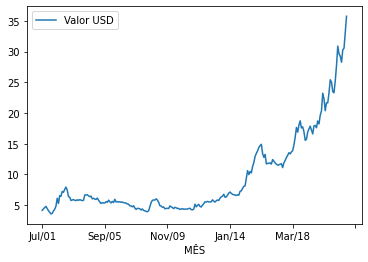

In [40]:
preco_gasolina_2001_2021.plot("MÊS", "Valor USD")

<AxesSubplot:xlabel='Data'>

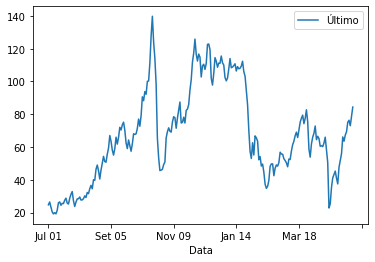

In [41]:
petroleo_brent_2001_2021.plot("Data", "Último")

In [42]:
petroleo_brent_2001_2021

,Data,Último
0,Jul 01,24.690001
1,Ago 01,26.410000
2,Set 01,23.260000
3,Out 01,20.370001
4,Nov 01,19.139999
...,...,...
239,Jun 21,75.129997
240,Jul 21,76.330002
241,Ago 21,72.989998
242,Set 21,78.519997


In [43]:
preco_gasolina_2001_2021.head()

,MÊS,PRECO MÉDIO REVENDA,Valor USD
0,Jul/01,1.681,4.157113
1,Aug/01,1.711,4.387004
2,Sep/01,1.718,4.587060
3,Oct/01,1.779,4.796184
4,Nov/01,1.780,4.441100


In [44]:
preco_gasolina_2001_2021["ANO"] = preco_gasolina_2001_2021["MÊS"].str.replace('^\w+/', '20', regex=True)
preco_gasolina_2001_2021.head()

<ipython-input-44-5ff2d3764d43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preco_gasolina_2001_2021["ANO"] = preco_gasolina_2001_2021["MÊS"].str.replace('^\w+/', '20', regex=True)


,MÊS,PRECO MÉDIO REVENDA,Valor USD,ANO
0,Jul/01,1.681,4.157113,2001
1,Aug/01,1.711,4.387004,2001
2,Sep/01,1.718,4.587060,2001
3,Oct/01,1.779,4.796184,2001
4,Nov/01,1.780,4.441100,2001


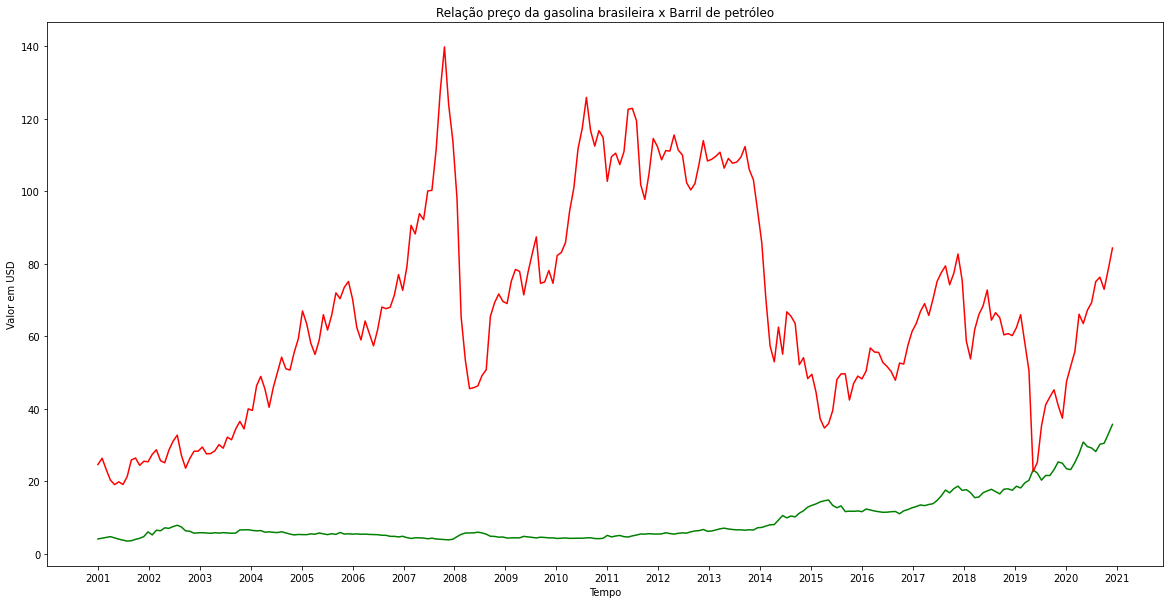

In [45]:
width = 20
height = 10
width_height = (width, height)
plt.figure(figsize=width_height)

plt.plot(preco_gasolina_2001_2021["MÊS"], preco_gasolina_2001_2021["Valor USD"],  color='g', label='Gasolina')
plt.plot(preco_gasolina_2001_2021["MÊS"], petroleo_brent_2001_2021["Último"], color='r', label='Petróleo')


plt.xticks(np.linspace(0, 244, 21), labels=preco_gasolina_2001_2021.loc[::12, "ANO"])


plt.xlabel("Tempo")
plt.ylabel("Valor em USD")
plt.title("Relação preço da gasolina brasileira x Barril de petróleo")

plt.show()

In [46]:
serie_historica_completa = pandas.DataFrame(data={"Petroleo": petroleo_brent_2001_2021["Último"], 
                                          "Gasolina": preco_gasolina_2001_2021["Valor USD"]})
kmeans = KMeans(n_clusters=2).fit(serie_historica_completa)
centroids = kmeans.cluster_centers_


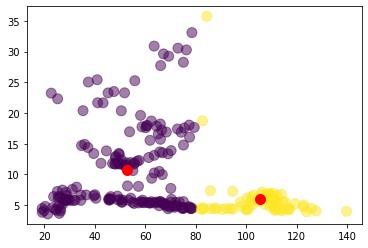

In [47]:

plt.scatter(serie_historica_completa['Petroleo'], serie_historica_completa['Gasolina'],
            c= kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.show()

In [48]:
preco_gasolina_2001_2021.head()

,MÊS,PRECO MÉDIO REVENDA,Valor USD,ANO
0,Jul/01,1.681,4.157113,2001
1,Aug/01,1.711,4.387004,2001
2,Sep/01,1.718,4.587060,2001
3,Oct/01,1.779,4.796184,2001
4,Nov/01,1.780,4.441100,2001


In [49]:
preco_gasolina_antes_ppi = preco_gasolina_2001_2021.iloc[:-61]
preco_gasolina_antes_ppi.reset_index(drop=True, inplace=True)

barril_petroleo_antes_ppi = petroleo_brent_2001_2021.iloc[:-61]
barril_petroleo_antes_ppi.reset_index(drop=True, inplace=True)


In [50]:
preco_gasolina_antes_ppi

,MÊS,PRECO MÉDIO REVENDA,Valor USD,ANO
0,Jul/01,1.681,4.157113,2001
1,Aug/01,1.711,4.387004,2001
2,Sep/01,1.718,4.587060,2001
3,Oct/01,1.779,4.796184,2001
4,Nov/01,1.780,4.441100,2001
...,...,...,...,...
178,May/16,3.674,13.264977,2016
179,Jun/16,3.646,11.713140,2016
180,Jul/16,3.638,11.812950,2016
181,Aug/16,3.651,11.780316,2016


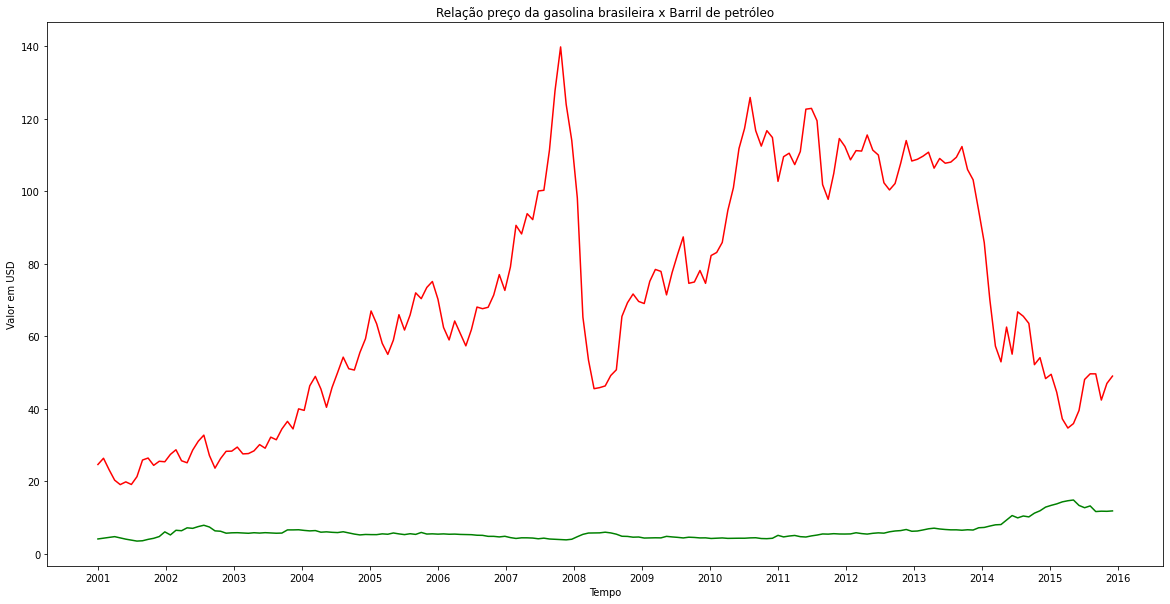

In [51]:
width = 20
height = 10
width_height = (width, height)
plt.figure(figsize=width_height)

plt.plot(preco_gasolina_antes_ppi["MÊS"], preco_gasolina_antes_ppi["Valor USD"],  color='g', label='Gasolina')
plt.plot(preco_gasolina_antes_ppi["MÊS"], barril_petroleo_antes_ppi["Último"], color='r', label='Petróleo')


plt.xticks(np.linspace(0, 183, 16), labels=preco_gasolina_antes_ppi.loc[::12, "ANO"])


plt.xlabel("Tempo")
plt.ylabel("Valor em USD")
plt.title("Relação preço da gasolina brasileira x Barril de petróleo")

plt.show()

In [52]:
serie_historica_antes_ppi = pandas.DataFrame(data={"Petroleo": barril_petroleo_antes_ppi["Último"], 
                                          "Gasolina": preco_gasolina_antes_ppi["Valor USD"]})
kmeans = KMeans(n_clusters=2).fit(serie_historica_antes_ppi)
centroids = kmeans.cluster_centers_


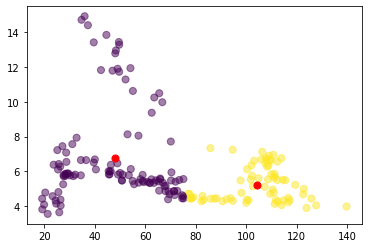

In [53]:

plt.scatter(serie_historica_antes_ppi['Petroleo'], serie_historica_antes_ppi['Gasolina'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [54]:
preco_gasolina_depois_ppi = preco_gasolina_2001_2021.iloc[183:]
preco_gasolina_depois_ppi.reset_index(drop=True, inplace=True)

barril_petroleo_depois_ppi = petroleo_brent_2001_2021.iloc[183:]
barril_petroleo_depois_ppi.reset_index(drop=True, inplace=True)


In [63]:
preco_gasolina_depois_ppi

,MÊS,PRECO MÉDIO REVENDA,Valor USD,ANO
0,Oct/16,3.662,11.673723,2016
1,Nov/16,3.671,12.417892,2016
2,Dec/16,3.734,12.147449,2016
3,Jan/17,3.768,11.871838,2017
4,Feb/17,3.755,11.672793,2017
...,...,...,...,...
56,Jun/21,5.687,28.256427,2021
57,Jul/21,5.807,30.267825,2021
58,Aug/21,5.933,30.550203,2021
59,Sep/21,6.078,33.081339,2021


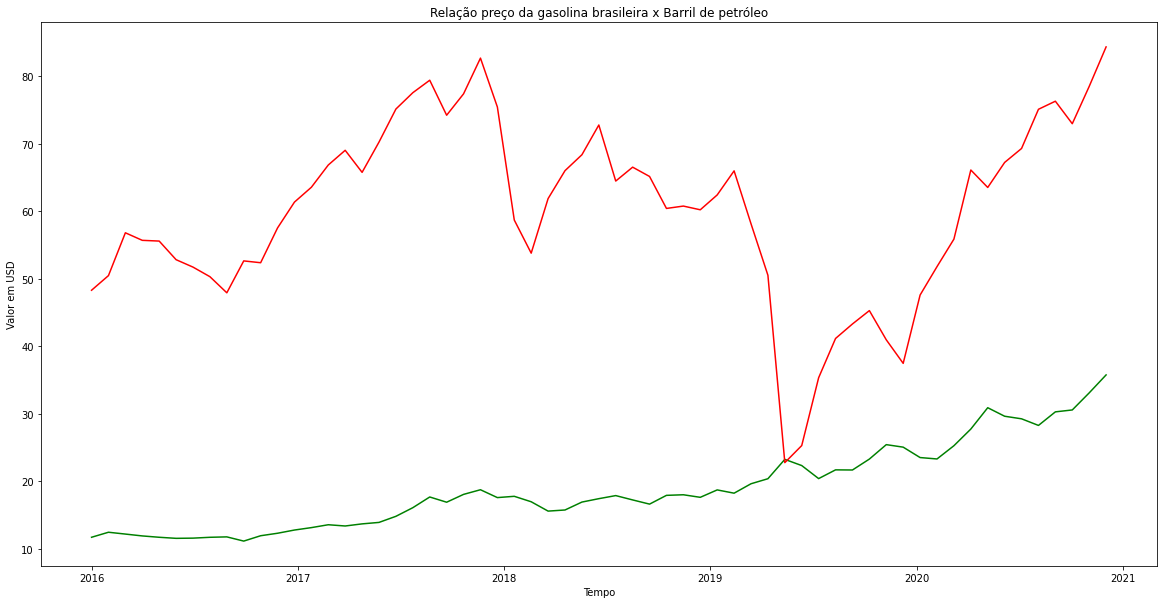

In [62]:
width = 20
height = 10
width_height = (width, height)
plt.figure(figsize=width_height)

plt.plot(preco_gasolina_depois_ppi["MÊS"], preco_gasolina_depois_ppi["Valor USD"],  color='g', label='Gasolina')
plt.plot(preco_gasolina_depois_ppi["MÊS"], barril_petroleo_depois_ppi["Último"], color='r', label='Petróleo')


plt.xticks(np.linspace(0, 61, 6), labels=preco_gasolina_depois_ppi.loc[::12, "ANO"])


plt.xlabel("Tempo")
plt.ylabel("Valor em USD")
plt.title("Relação preço da gasolina brasileira x Barril de petróleo")

plt.show()

In [80]:
serie_historica_depois_ppi = pandas.DataFrame(data={"Petroleo": barril_petroleo_depois_ppi["Último"], 
                                          "Gasolina": preco_gasolina_depois_ppi["Valor USD"]})
kmeans = KMeans(n_clusters=2).fit(serie_historica_depois_ppi)
centroids = kmeans.cluster_centers_


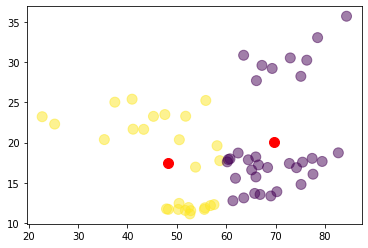

In [81]:
plt.scatter(serie_historica_depois_ppi['Petroleo'], serie_historica_depois_ppi['Gasolina'],
            c= kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.show()

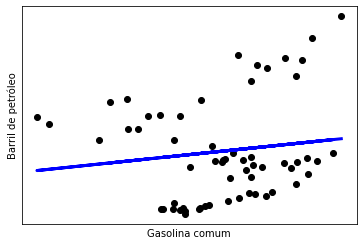

In [78]:
petroleo = barril_petroleo_depois_ppi["Último"].values.reshape(61, 1)
gasolina = preco_gasolina_depois_ppi["Valor USD"].values.reshape(61, 1)
regression = LinearRegression()
regression.fit(petroleo, gasolina)
plt.scatter(petroleo, gasolina,  color='black')
plt.plot(petroleo, regression.predict(petroleo), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.ylabel("Barril de petróleo")
plt.xlabel("Gasolina comum")
plt.show()


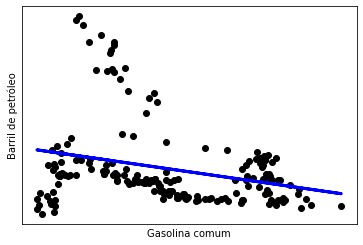

In [79]:
petroleo = barril_petroleo_antes_ppi["Último"].values.reshape(183, 1)
gasolina = preco_gasolina_antes_ppi["Valor USD"].values.reshape(183, 1)
regression = LinearRegression()
regression.fit(petroleo, gasolina)
plt.scatter(petroleo, gasolina,  color='black')
plt.plot(petroleo, regression.predict(petroleo), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.ylabel("Barril de petróleo")
plt.xlabel("Gasolina comum")
plt.show()